# Penjelasan Dataset

| Column Name                   | Data Type      | Description                                                                                                                        |
| ----------------------------- | -------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| order_id                      | object         | ID unik untuk setiap transaksi pelanggan, digunakan sebagai identifikasi utama order dan perhitungan jumlah transaksi (Frequency). |
| customer_id                   | object         | ID unik pelanggan, digunakan untuk membangun profil customer dan segmentasi RFM.                                                   |
| order_status                  | object         | Status pesanan (delivered, shipped, cancelled, dll.), digunakan untuk filtering transaksi valid dan evaluasi pengalaman pelanggan. |
| order_purchase_timestamp      | datetime64[ns] | Waktu pesanan dilakukan, digunakan untuk menghitung Recency (jarak waktu pembelian terakhir).                                      |
| order_approved_at             | datetime64[ns] | Waktu pembayaran disetujui, mencerminkan validasi transaksi yang berhasil diproses.                                                |
| order_delivered_timestamp     | datetime64[ns] | Waktu pesanan diterima pelanggan, digunakan untuk analisis performa pengiriman dan perhitungan durasi pengiriman.                  |
| order_estimated_delivery_date | datetime64[ns] | Perkiraan tanggal pengiriman, digunakan untuk analisis ketepatan waktu (delivery delay).                                           |
| product_id                    | object         | ID unik produk, digunakan untuk analisis preferensi produk dan product affinity.                                                   |
| seller_id                     | object         | ID penjual, digunakan untuk analisis kontribusi seller dan performa marketplace.                                                   |
| price                         | float64        | Harga produk yang dibeli, komponen utama perhitungan Monetary dalam analisis RFM.                                                  |
| shipping_charges              | float64        | Biaya pengiriman yang dibayar pelanggan, dianalisis untuk melihat pengaruh ongkir terhadap keputusan pembelian.                    |
| product_category_name         | object         | Kategori produk (electronics, household, dll.), digunakan untuk segmentasi minat dan analisis performa produk.                     |
| product_weight_g              | float64        | Berat produk dalam gram, relevan untuk analisis logistik dan estimasi biaya pengiriman.                                            |
| product_length_cm             | float64        | Panjang produk dalam sentimeter, digunakan dalam analisis volume dan efisiensi pengiriman.                                         |
| product_height_cm             | float64        | Tinggi produk dalam sentimeter, mendukung analisis packaging dan distribusi.                                                       |
| product_width_cm              | float64        | Lebar produk dalam sentimeter, digunakan dalam perhitungan dimensi produk untuk kebutuhan logistik.                                |
| payment_sequential            | int64          | Urutan pembayaran jika terdapat lebih dari satu metode pembayaran dalam satu order.                                                |
| payment_type                  | object         | Jenis pembayaran (credit card, debit card, e-wallet, dll.), membantu segmentasi berdasarkan preferensi finansial pelanggan.        |
| payment_installments          | int64          | Jumlah cicilan yang dipilih pelanggan, menggambarkan sensitivitas harga dan perilaku finansial pelanggan.                          |
| payment_value                 | float64        | Total nominal pembayaran, digunakan dalam perhitungan Customer Value dan Monetary pada analisis RFM.                               |
| customer_zip_code_prefix      | int64          | Kode pos pelanggan, digunakan untuk segmentasi geografis dan analisis distribusi wilayah.                                          |
| customer_city                 | object         | Kota pelanggan, digunakan untuk analisis geocluster dan potensi pasar regional.                                                    |
| customer_state                | object         | Provinsi pelanggan, digunakan untuk segmentasi regional dan strategi distribusi.                                                   |


# Import Data


# Library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import math
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/produk/Product Analysis.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

## Menampilkan data

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99996,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99997,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99998,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP


**`df.head()`** menampilkan beberapa baris teratas atau pertama dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   customer_id                    100000 non-null  object 
 2   order_status                   100000 non-null  object 
 3   order_purchase_timestamp       100000 non-null  object 
 4   order_approved_at              100000 non-null  object 
 5   order_delivered_timestamp      98464 non-null   object 
 6   order_estimated_delivery_date  100000 non-null  object 
 7   product_id                     100000 non-null  object 
 8   seller_id                      100000 non-null  object 
 9   price                          100000 non-null  float64
 10  shipping_charges               100000 non-null  float64
 11  product_category_name          99981 non-null   object 
 12  product_weight_g               

**`df.info()`** memberikan ringkasan struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori, membantu memahami data sebelum analisis.

Memperbaiki tipe data

In [ ]:
# Daftar kolom tanggal
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]

# Konversi ke datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Cek hasilnya
df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       100000 non-null  datetime64[ns]
 1   order_approved_at              100000 non-null  datetime64[ns]
 2   order_delivered_timestamp      98464 non-null   datetime64[ns]
 3   order_estimated_delivery_date  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.1 MB


Memeriksa kembali

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100000 non-null  object        
 1   customer_id                    100000 non-null  object        
 2   order_status                   100000 non-null  object        
 3   order_purchase_timestamp       100000 non-null  datetime64[ns]
 4   order_approved_at              100000 non-null  datetime64[ns]
 5   order_delivered_timestamp      98464 non-null   datetime64[ns]
 6   order_estimated_delivery_date  100000 non-null  datetime64[ns]
 7   product_id                     100000 non-null  object        
 8   seller_id                      100000 non-null  object        
 9   price                          100000 non-null  float64       
 10  shipping_charges               100000 non-null  float64       
 11  p

## Menampilkan ringkasan statistik

In [ ]:
df.describe(include=['int64', 'float64'])

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
count,100000.000000,100000.000000,99986.000000,99986.000000,99986.000000,99986.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,519.373862,45.021183,1817.657352,31.478117,15.751065,24.961575,1.104740,2.587790,297.371103,40043.759870
std,872.859682,42.807050,2543.057379,14.562938,10.441849,11.032317,0.861195,2.552645,387.492636,30602.253486
min,0.850000,0.070000,0.000000,7.000000,2.000000,7.000000,1.000000,1.000000,0.200000,1004.000000
25%,89.100000,19.630000,396.000000,20.000000,10.000000,15.000000,1.000000,1.000000,85.360000,9655.000000
50%,159.900000,34.330000,1110.000000,30.000000,12.000000,20.000000,1.000000,1.000000,170.760000,35938.000000
75%,564.990000,54.420000,1750.000000,42.000000,22.000000,30.000000,1.000000,3.000000,336.060000,68458.000000
max,4590.000000,321.880000,30000.000000,105.000000,105.000000,105.000000,23.000000,24.000000,6929.310000,99990.000000


Dari hasil ringkasan statistik pada data ini :
- 50% transaksi memiliki harga ≤ 159.90
- 75% transaksi memiliki harga ≤ 564.99
- Hanya 25% transaksi berada di atas 564.99
- Mean jauh lebih besar dari median → terdapat outlier harga tinggi
- Mayoritas produk berukuran kecil sampai menengah

## Distribusi Data

- Dilakukan pemeriksaan distribusi data untuk mengetahui pola sebaran nilai pada setiap variabel.
- Pemeriksaan ini bertujuan untuk melihat apakah data berdistribusi normal atau tidak, sehingga dapat ditentukan metode analisis yang sesuai pada tahap selanjutnya.
- Pemriksaan persebaran data menggunakan Uji Kolmogorov–Smirnov karena jumlah data > 5000

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:

    # Standarisasi (Z-score)
    data_z = (df[col] - df[col].mean()) / df[col].std()

    # Drop NA jika ada
    data_z = data_z.dropna()

    # Uji KS
    stat, p = kstest(data_z, 'norm')

    print(f"Kolom: {col}")
    print(f"  Statistik uji : {stat:.4f}")
    print(f"  p-value       : {p:.6f}")

    if p > 0.05:
        print("  ➜ Data berdistribusi normal\n")
    else:
        print("  ➜ Data tidak berdistribusi normal\n")

Kolom: price
  Statistik uji : 0.2762
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: shipping_charges
  Statistik uji : 0.1764
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_weight_g
  Statistik uji : 0.2978
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_length_cm
  Statistik uji : 0.1627
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_height_cm
  Statistik uji : 0.1656
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: product_width_cm
  Statistik uji : 0.1881
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_sequential
  Statistik uji : 0.5107
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_installments
  Statistik uji : 0.2829
  p-value       : 0.000000
  ➜ Data tidak berdistribusi normal

Kolom: payment_value
  Statistik uji : 0.2225
  p-value       : 0.000000
  ➜ Data tidak berdistribu

Distribusi tidak normal pada data penjualan merupakan fenomena yang wajar dan umum terjadi dalam sistem e-commerce.Pola ini mencerminkan adanya ketimpangan nilai transaksi, di mana sebagian besar transaksi bernilai kecil hingga menengah, sementara sebagian kecil transaksi memiliki nilai yang jauh lebih tinggi.

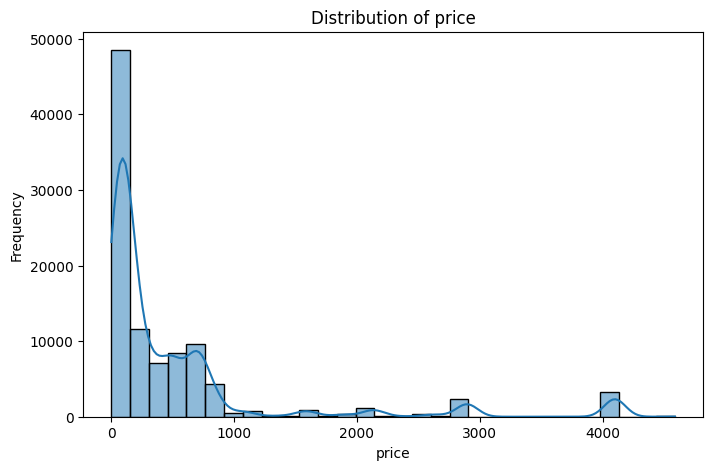

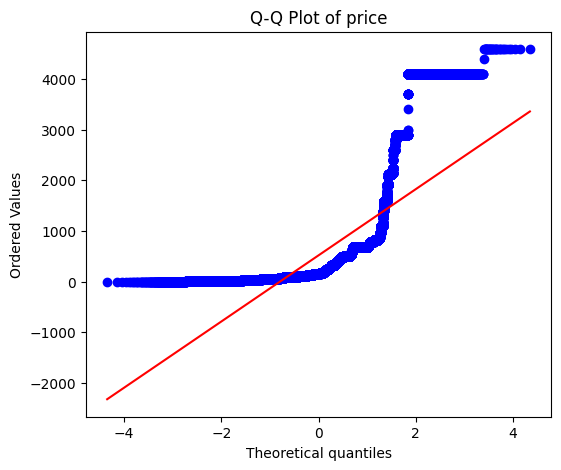

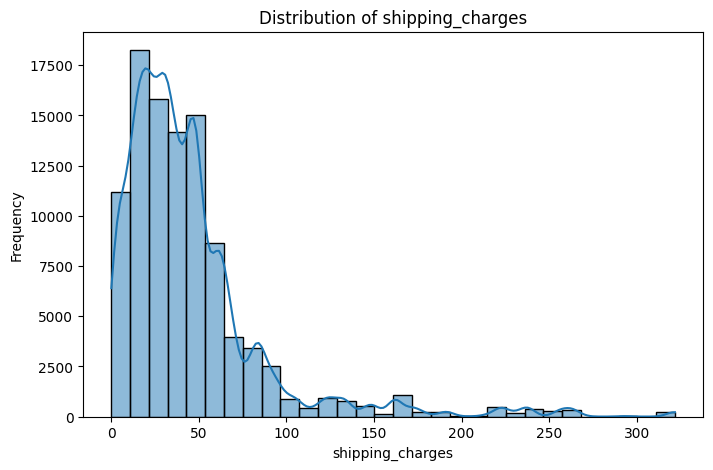

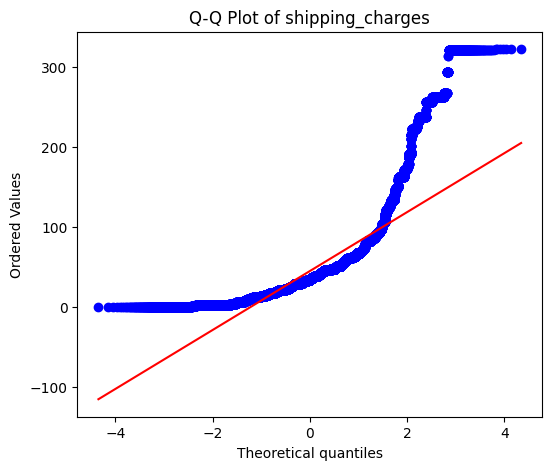

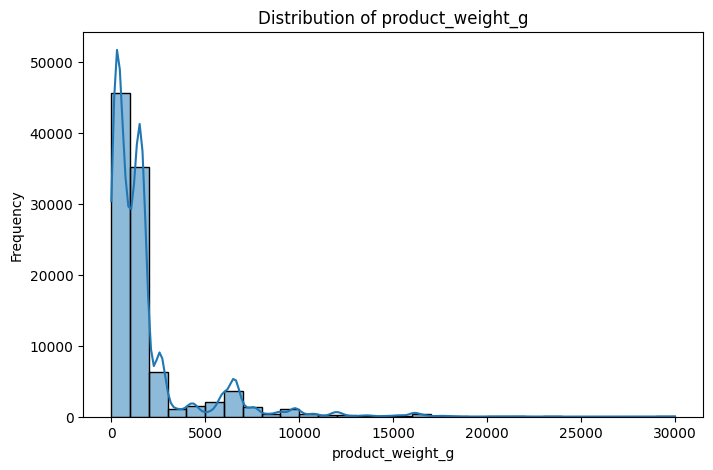

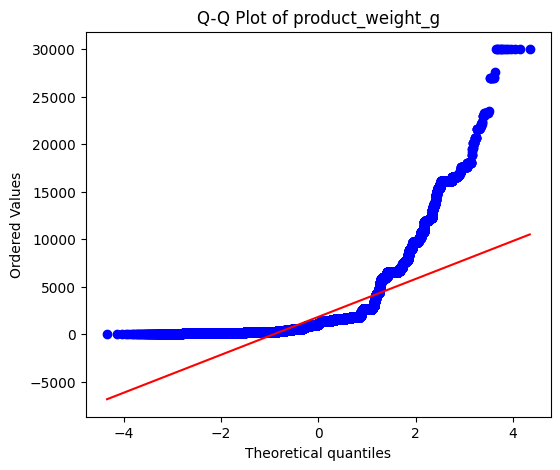

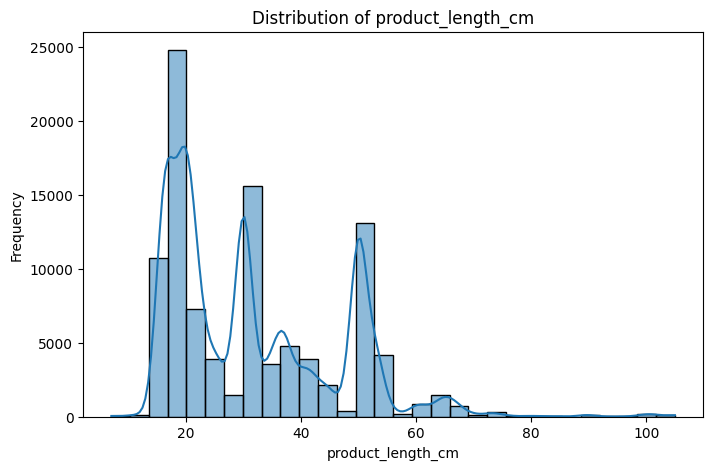

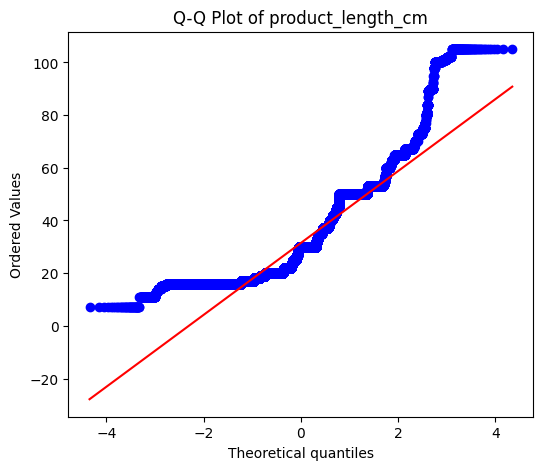

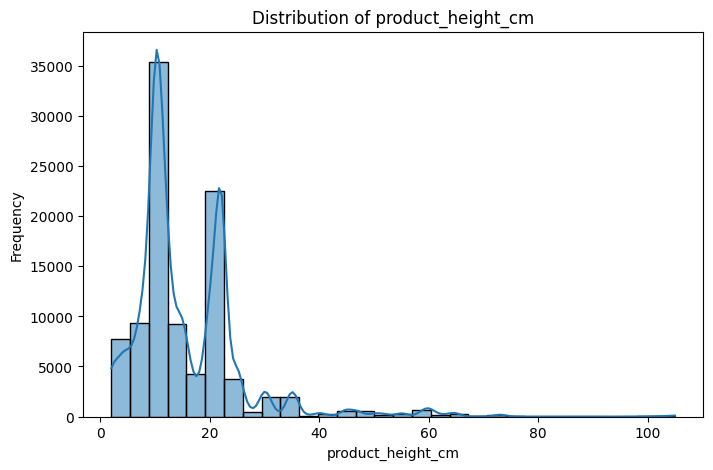

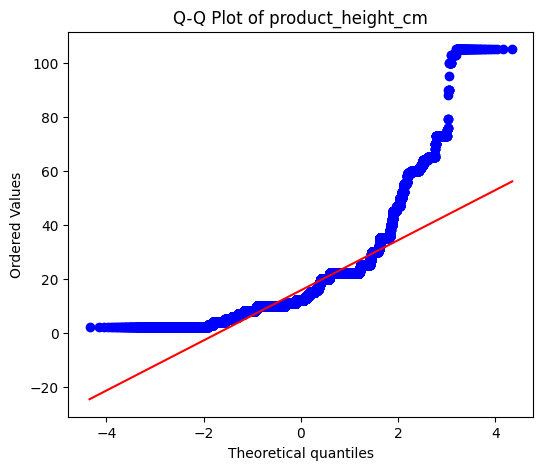

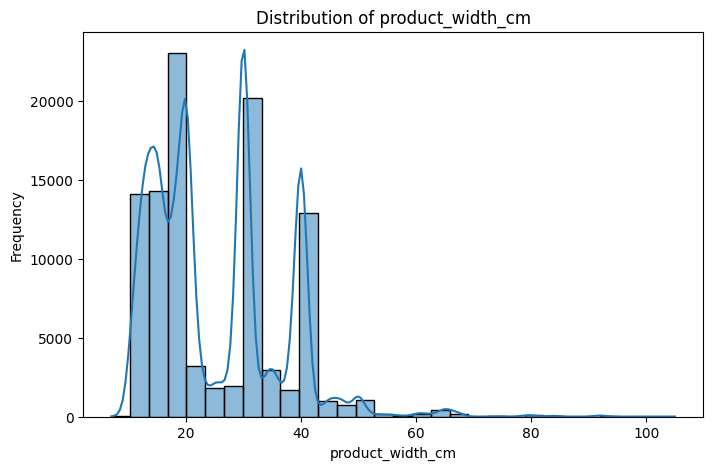

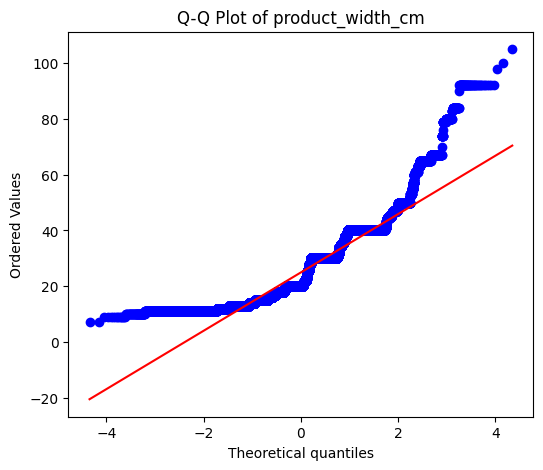

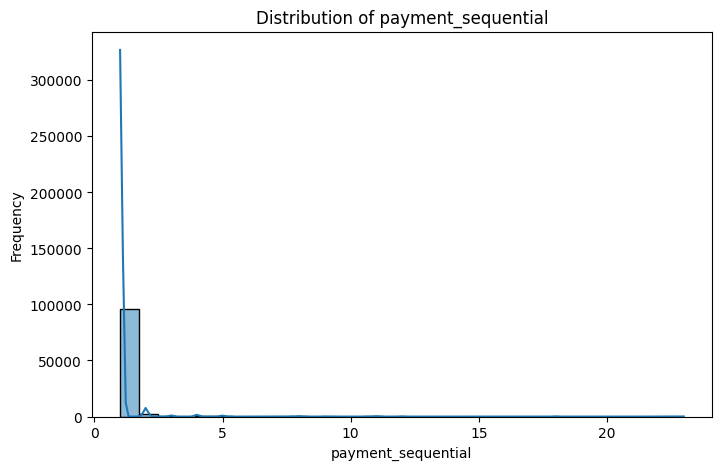

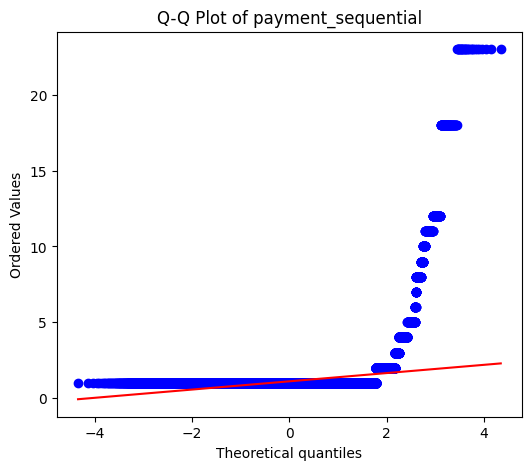

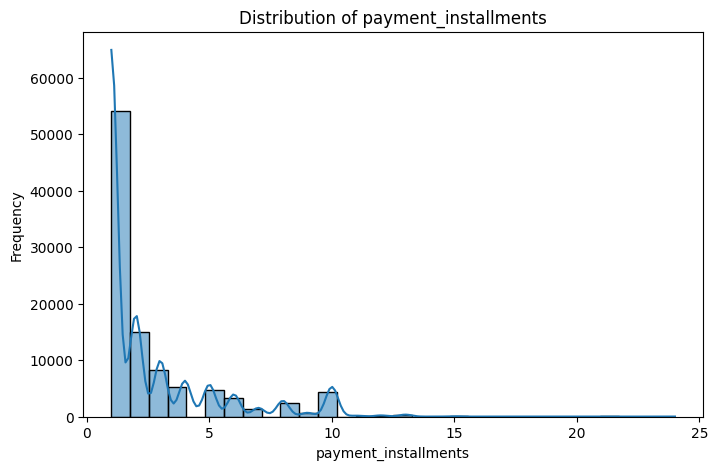

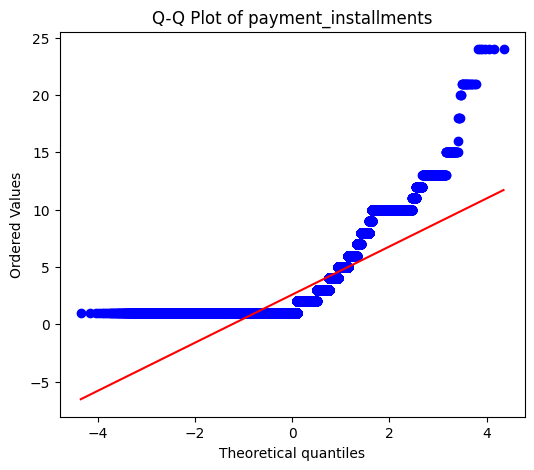

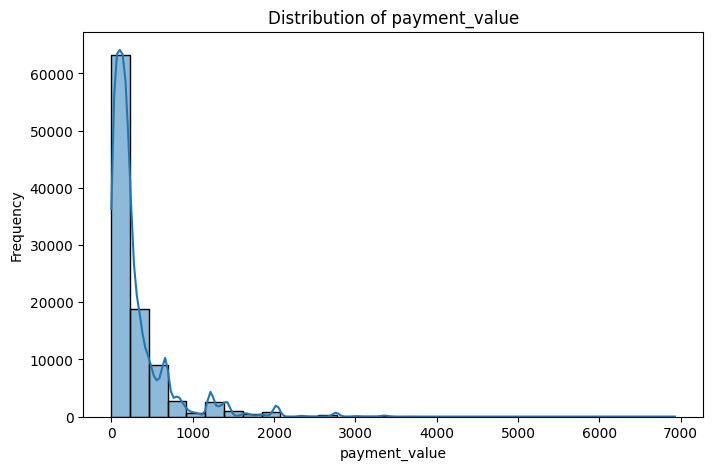

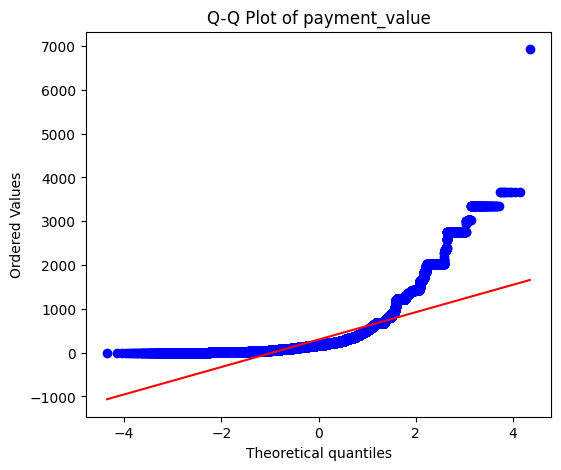

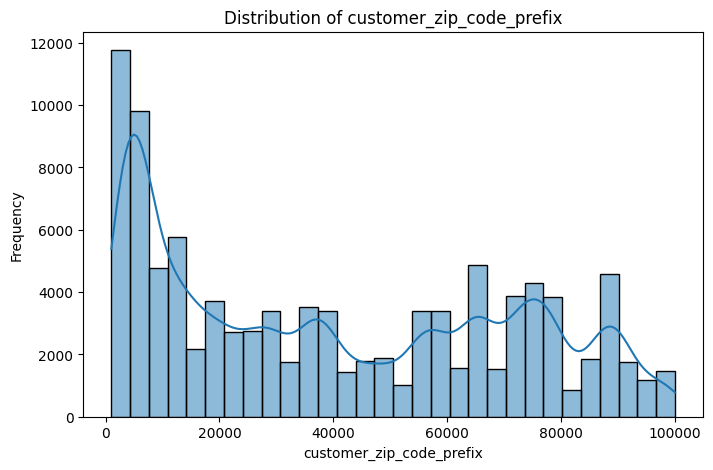

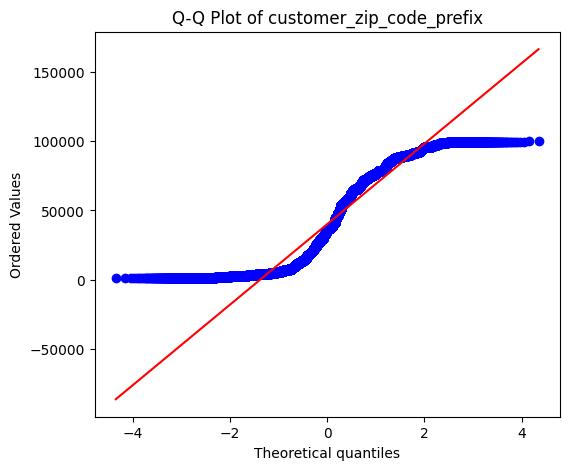

In [ ]:
# Mengambil semua kolom dengan tipe data numerik (int dan float)
# Kolom bertipe datetime atau object otomatis tidak ikut
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Melakukan perulangan untuk setiap kolom numerik
for col in numeric_cols:

    # Menghapus nilai NaN agar tidak mengganggu visualisasi
    data = df[col].dropna()

    # HISTOGRAM

    # Mengatur ukuran figure
    plt.figure(figsize=(8,5))

    # Membuat histogram dengan 30 interval (bins)
    # kde=True menambahkan kurva distribusi
    sns.histplot(data, bins=30, kde=True, edgecolor='black')

    # Memberikan label dan judul
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

    # Menampilkan histogram
    plt.show()

    # Q-Q PLOT

    # Membuat figure baru
    plt.figure(figsize=(6,5))

    # Membandingkan distribusi data dengan distribusi normal
    probplot(data, dist="norm", plot=plt)

    # Memberikan judul
    plt.title(f'Q-Q Plot of {col}')

    # Menampilkan Q-Q Plot
    plt.show()

## Memeriksa data kosong

In [ ]:
pd.isnull(df).sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_timestamp,1536
order_estimated_delivery_date,0
product_id,0
seller_id,0
price,0


In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent

,0
order_id,0.000
customer_id,0.000
order_status,0.000
order_purchase_timestamp,0.000
order_approved_at,0.000
order_delivered_timestamp,1.536
order_estimated_delivery_date,0.000
product_id,0.000
seller_id,0.000
price,0.000


Terdapat missing value pada kolom
-  `order_delivered_timestamp` memiliki missing value sebanyak 1.56%
- `product_category_name`memiliki missing value sebanyak 0.019%
- `product_weight_g` memiliki missing value sebanyak 0.014%
- `product_length_cm`	memiliki missing value sebanyak 0.014%
- `product_height_cm`	memiliki missing value sebanyak 0.014%
- `product_width_cm` memiliki missing value sebanyak 0.014%

## Memeriksa data duplikasi

In [ ]:
df.duplicated().sum()

np.int64(96360)

In [ ]:
df[df.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99996,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99997,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP
99998,GeG4KAwtrR78,uqCUB2mTXtlt,delivered,2017-09-22 15:26:28,2017-09-23 18:44:28,2017-09-28 18:48:56,2017-10-16,0vbEvli2JYJu,RKad98cTxhSb,95.03,...,50.0,10.0,40.0,1,credit_card,2,2759.95,56327,guarulhos,SP


# Data Cleaning

Membuat data frame baru salinan dari df agar ketika digunakan untuk analisis tidak merusak data asli

In [ ]:
df_cleaned = df.copy()

## Menangani missing values

In [ ]:
df_cleaned = df_cleaned.dropna(subset=[
    'product_category_name',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
])


jumlah missing value berada dibawah 5%, lebih baik dihapus.
Oleh karena itu, sebagian besar kolom dengan missing value diputuskan untuk dihapus (drop) karena jumlahnya relatif kecil dan tidak memengaruhi struktur utama dataset.

Namun, terdapat pengecualian pada kolom `order_delivered_timestamp`.
Missing value pada kolom terebut terjadi,disebabkan oleh status pesanan tertentu seperti:
- canceled
- invoiced
- processing
- shipped

Pesanan dengan status tersebut memang secara logis belum memiliki waktu pengiriman (delivered timestamp), sehingga nilai kosong pada kolom tersebut merupakan kondisi yang wajar dan mencerminkan proses bisnis, bukan kesalahan data.

In [ ]:
pd.isnull(df_cleaned).sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_timestamp,81
order_estimated_delivery_date,0
product_id,0
seller_id,0
price,0


## Menangani duplikat data

In [ ]:
# Menghapus duplikat data
df_cleaned = df_cleaned.drop_duplicates()

Duplikasi yang ditemukan, yaitu seluruh kolom memiliki nilai yang identik, termasuk kolom ID. Hal ini menunjukkan bahwa baris-baris tersebut bukan entri transaksi yang berbeda, melainkan pengulangan data yang sama.

Karena data yang terduplikasi tidak memberikan informasi tambahan, maka dilakukan proses penghapusan duplikat.
Dengan demikian, hanya tersisa sekitar 3.640 data unik setelah proses penghapusan duplikat.

In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

## Memeriksa konsistensi data

In [ ]:
# Mengatur agar isi kolom (terutama list unique values) tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)

# Membuat list kosong untuk menampung informasi setiap kolom
list_info = []

# Melakukan iterasi pada setiap kolom di dataframe
for col in df_cleaned.columns:
    list_info.append([
        col,                                # Nama kolom
        df_cleaned[col].dtype,                 # Tipe data kolom
        df_cleaned[col].nunique(),             # Jumlah nilai unik pada kolom
        list(df_cleaned[col].unique())         # Daftar seluruh nilai unik pada kolom
    ])

# Mengubah list menjadi DataFrame agar lebih mudah dibaca
df_info = pd.DataFrame(
    columns=['column', 'dtype', 'n_unique', 'unique_values'],
    data=list_info
)

# Menampilkan ringkasan informasi kolom
display(df_info)

,column,dtype,n_unique,unique_values
0,order_id,object,3632,"[Axfy13Hk4PIk, v6px92oS8cLG, Ulpf9skrhjfm, bwJVWupf2keN, Dd0QnrMk9Cj5, VjTVGzqe8U6R, xNba906m4TM1, VEDSMTavbQwk, DzNM8wrcMGFH, NpJz7zF9U1ae, mHyhzcUeLGj2, StM5K4TLyrt5, Q97dFuo1kaq9, 07j6mlMhSVtx, kxa1InBj9gwP, P5R6jr1qZdh4, HqV5f8K2UYoA, j5rwgECNf14O, 43It0OEHVyJe, ddXx4T93MeaI, NXDsEGbl1pUC, MhDudBaAab78, XupzjrovQeez, YTztQOHlvuBg, xfXLgLbCo5BC, gVMP1bPDg69L, 9G9EHbafs7NW, INolFarYfmEO, LV0vJIDricq1, VtQvdStc00Xd, tOTdnjpI8Udp, ebR5efLCCpiq, YOKYMSjKRCMN, 57XZHymoJ10l, yUz40ih0jYGt, IeZYtitws7WU, ZPkh9QhjG7SK, KJL5uJuZzKxr, SelY2hgVvruM, 0QqNX4xLriht, HNXQI2lmI4AR, C21fWds5zL0W, 00NEIdaOTIgn, XprtHqpLEddw, ph9ImXx6aMjl, x0fzGpICAZ0w, YUX432Je58GK, C3u0OwYQ8nuP, UaZKqhLFwRZP, QOaNjVewOOTX, lo8oje94TYb7, O5bLel2qV1yT, 3ffaVBUrnCxy, 8g4jF6hPD6tG, IBT786JmVIAa, Rd6Tke4v8afv, NnoGZNF5rNkD, gZMKyNzWXvcQ, qcDbJ8F0FIjM, hyJjgFRI44lc, EfyYNfniuxQP, 0MQGlO2eQrNG, zb8Qfa2K9ynp, LLWFihCYlP6a, PBvPGqQxwFDV, OQHE8Ve7n811, Vtkwb0b4JxKg, 4qLswBjaDZnT, XXzZNogGt47r, Pp9bMvTIgPDs, zh6skhlWLDTv, z9Zr742C0ASe, AayA35wXEdbB, kuyUMcYHFGqn, efc3TQanhsCE, vFUriN4pz2Bi, 1CVQ66HlMRUR, jJgDALmwe6f6, n8p0M8Vco4SQ, pNSYSUcXxkhB, 9AWAHq3HWS6u, DlmtCXqKjfWj, KqH0sXMHdItQ, OiIetUyiPLHG, 1pgvtCG93rNg, qJHIiWyTAizV, vSug5AqRo9gE, cuAQQZUhTEwb, yYk586LcCRYw, 2HQ26ShSPhCA, iWJeaLiduq7C, 1vz8w7BjKsWC, h8KEpd8n4gLL, PC71lF6z451l, TySAT9hqufKc, Y72RuFd0mZnO, JQnDQBQZYwWs, qcXjhr3DZYmI, 3SQKKPbTrStx, IKSlI8m4cXvg, ...]"
1,customer_id,object,3632,"[hCT0x9JiGXBQ, PxA7fv9spyhx, g3nXeJkGI0Qw, EOEsCQ6QlpIg, mVz5LO2Vd6cL, UkqnhxmX7YMP, 85jiDiGSfhTu, gDdkaN8b9s1g, 9Csx6oXlpLl1, gZTPKLPRnreg, TDEBQrhIwApB, 1k71TCYNFCzj, IfWKDQHkjLDd, kZ0rkJCJ6N5y, zsCKIdqYLV01, FrEvnEiMKGpr, 3zvaY9gUH9bO, bUornDCZmRD4, qEVfsXFU3er9, mPg90mQwmDOP, v6GelvnCrAk5, lZ0pUFQvjZNA, ckZATUjYdFd3, GuxDt46GwQEd, SPV4UclettEh, GpdbWoJi61Qc, KD8KlSTtIm3Z, QU7yWUgfIpJX, rgjb3WchpjHg, JyHhNu9cbCo1, Jw0zo2CWiEs7, MXiUFyGLUs2Z, oiBrZODbJTvz, mcuPjOLRkNpR, yOjH9Exn64WQ, yca6TkmY4yQm, LooHWGt3K5gp, oZqYD7eyV1EJ, 0hj86xqZbYSV, l2wCGNSY1l3Z, ukZ709Rl8bdF, iFsAJRrzVaTS, tSG89uyaK6MS, Ex7BhwPvrGyQ, f4Frm4WEvj1g, ORO4ADUB1jHd, jQ0u9oBPe3Mg, 0I8vL0BlM1p1, JtX09eqY5lk3, sk3z82bQhZAO, eSqRKROmKF9Y, SNzA2roBQaGK, IGPOK4wVaGbv, 45WzrefbE0kB, dGD1MVag3snm, EI8c9beFpTSQ, YanexVtkhb2B, iaDXrhsLGSc6, hWGGX7sEla9R, MNcdWG4E5iDb, 7mxdMPX1ERJj, JJe2PPwxISzG, cnalXbv8lRur, Vpl3DrXMAEhb, cWwtMYBNlwy1, bEh2OYyGVzcI, 3JeAegsqlpZ1, 6gl6qALuNSUL, rAV7gKaOWkEy, CiOHqzRk5bbt, tIPFV5qJBgvT, yD2x7GOSsjqA, a9gFQyCfrVym, dXsploeBzop3, 9tQzKeNKhIoQ, TLYzpBJ3Cbnv, J2bElQYq3gEQ, lFEdYUjKo6tu, 8tpStNEuJ43p, qvo2fc2aRUvp, pk1Ke0Nxac36, UlqYPqEYgETA, M7wmpVTfmiFp, 4YfVSBGWPVdv, pqIfz7jRxaKh, 5XGKxFrzDdYP, oWBBqGwqpx4m, EeCs1w6JNdPU, hgHQgpZ9rVHu, uvuFFZDOAlU7, bVaqeOVzrNj1, EZkjVsEKMQF0, LkYwWbX35V3p, paCiJAGDh54D, wuCRBXrAQIyN, jsuJ85mr7Rlb, 7qqTmdyVGDMP, ebCRKHmjYa2q, ap5gXjoc79ju, 63cb18M1Z31w, ...]"
2,order_status,object,5,"[delivered, canceled, shipped, processing, invoiced]"
3,order_purchase_timestamp,datetime64[ns],3573,"[2017-10-22 18:57:54, 2018-06-20 21:40:31, 2018-02-16 16:19:31, 2018-08-18 18:04:29, 2017-12-22 16:44:04, 2017-09-01 14:38:16, 2018-04-23 21:03:00, 2018-02-23 14:49:39, 2017-11-24 19:12:37, 2017-11-30 11:48:21, 2018-04-02 22:39:59, 2018-05-30 09:25:25, 2018-04-10 00:17:56, 2018-05-02 22:52:10, 2017-04-24 20:06:41, 2017-07-24 11:38:43, 2018-06-15 15:44:21, 2018-03-15 11:13:23, 2017-03-05 16:10:01, 2017-10-03 12:58:11, 2018-04-02 00:31:04, 2017-08-16 19:36:38, 2017-06-21 16:41:10, 2017-07-02 21:10:38, 2018-02-18 12:03:25, 2017-12-30 02:36:20, 2018-07-18 18:42:47, 2018-06-30 21:08:36, 2017-11-05 19:14:22, 2017-03-07 19:19:19, 2018-07-10 12:15:42, 2018-02-03 17:08:22, 2018-04-10 08:42:53, 2017-09-05 13:32:39, 2018-03-15 15:20:17, 2017-05-16 09:23:23, 2017-08-05 18:13:21, 2018-07-17 15:21:10, 2017-05-05 17:23:59, 2017-05-15 19:39:50, 2017-09-05 14:56:58, 2017-02-04 12:58:55, 2018-05-07 22:34:11, 2017-06-08 20:25:53, 2017-08-16 22:58:04, 2018-04-27 23:54:06, 2018

## Deteksi outlier menggunakan IQR

In [ ]:
# Pilih semua kolom dengan tipe data integer
int_cols = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Hitung Q1, Q3, dan IQR
q1 = df_cleaned[int_cols].quantile(0.25)
q3 = df_cleaned[int_cols].quantile(0.75)
iqr = q3 - q1

# Hitung batas bawah dan batas atas
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Buat mask untuk mendeteksi outlier
mask = (df_cleaned[int_cols] < lower) | (df_cleaned[int_cols] > upper)

# Ambil baris yang memiliki minimal satu outlier
outliers = df_cleaned[mask.any(axis=1)]

# Tampilkan kolom integer yang mengandung outlier
outliers[int_cols]

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
40,263.90,40.26,2800.0,16.0,31.0,39.0,1,4,1014.75,25902
53,966.90,98.76,3975.0,46.0,12.0,43.0,1,1,123.79,4762
63,1534.90,66.90,250.0,45.0,15.0,35.0,1,5,146.51,75870
64,779.00,34.86,1200.0,30.0,23.0,30.0,1,1,1521.75,69068
72,135.91,48.71,4338.0,17.0,12.0,14.0,1,2,947.72,1223
...,...,...,...,...,...,...,...,...,...,...
99571,2600.00,47.55,250.0,40.0,4.0,30.0,1,2,102.12,4850
99635,58.10,53.53,11880.0,50.0,60.0,27.0,1,1,129.00,69930
99694,77.87,35.92,13700.0,35.0,20.0,20.0,1,3,160.52,18217
99695,57.66,140.52,220.0,22.0,13.0,12.0,1,1,111.01,6872


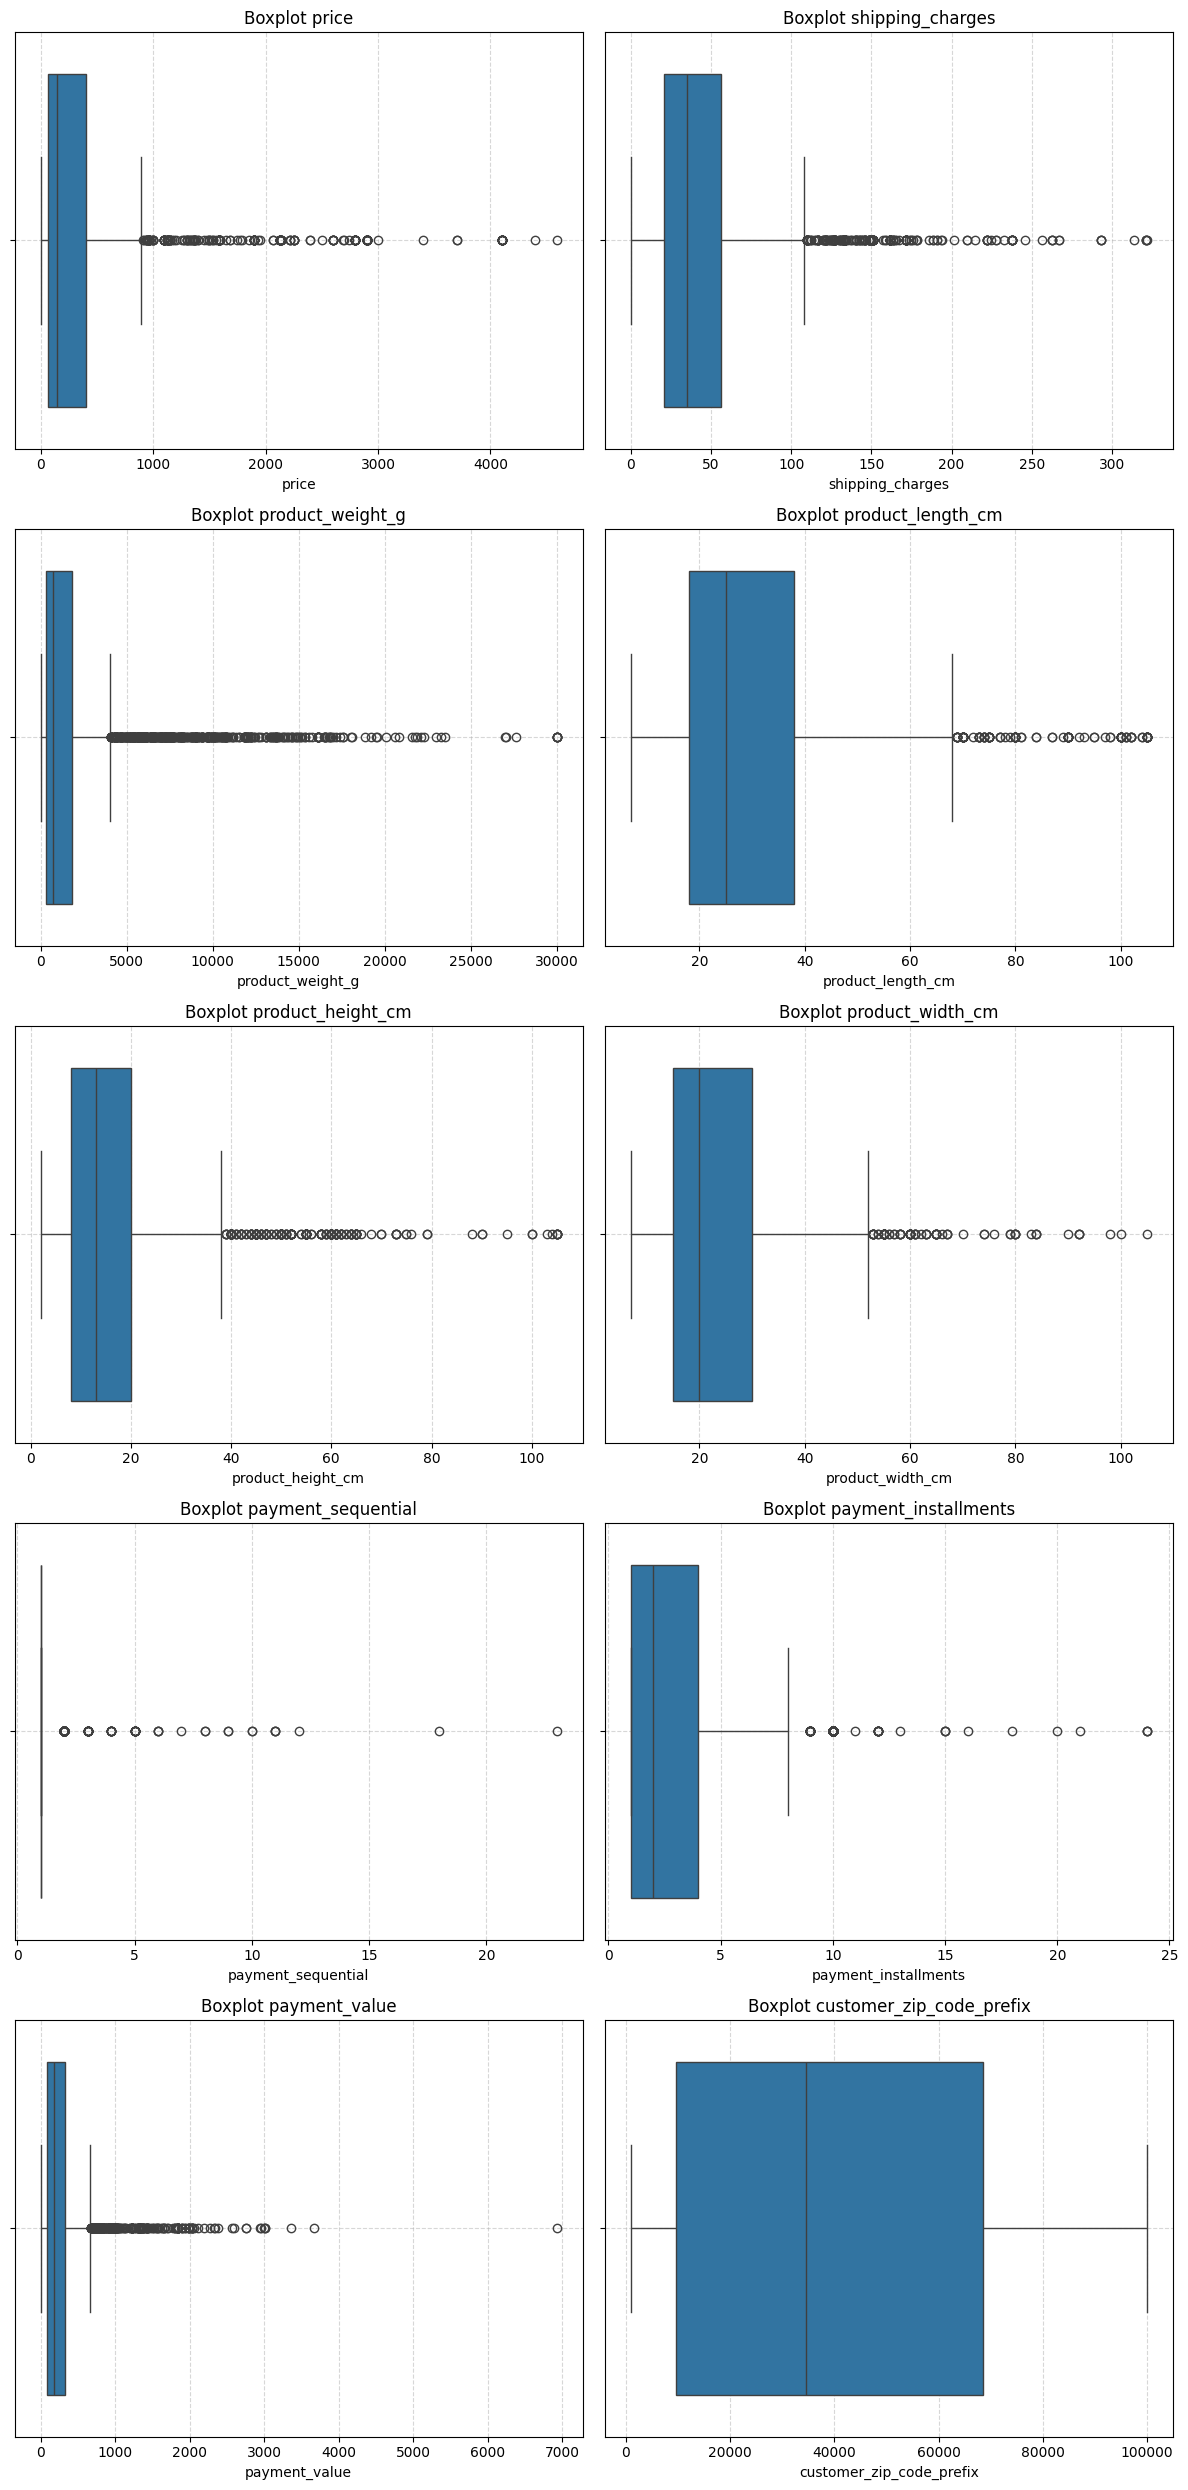

In [ ]:
# Ambil semua kolom integer
int_cols = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Tentukan jumlah kolom
n_cols = len(int_cols)

# Tentukan jumlah baris (2 plot per baris)
n_rows = math.ceil(n_cols / 2)

# Buat subplot
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))

# Ubah axes jadi 1D array supaya mudah di-loop
axes = axes.flatten()

# Loop untuk membuat boxplot tiap kolom
for i, col in enumerate(int_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hapus subplot kosong jika jumlah kolom ganjil
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Outlier dalam dataset ini dipertahankan karena hal tersebut adalah variasi perilaku transaksi dan bukan merupakan kesalahan data. Dengan demikian, analisis tetap merepresentasikan kondisi bisnis yang sebenarnya.

# Encoding

In [ ]:
df_raw = df_cleaned.copy()

In [ ]:
encoding = [   # kolom kategorikal yang akan di encoding
    'order_status',
    'product_category_name',
    'payment_type',
    'customer_city',
    'customer_state'

]


label_encoders = {} # Membuat dictionary untuk menyimpan objek LabelEncoder untuk tiap kolom

for col in encoding:
    le = LabelEncoder() # Membuat instance LabelEncoder baru
    df_raw[col] = le.fit_transform(df_raw[col])
    label_encoders[col] = le   # Menyimpan LabelEncoder di dictionary supaya bisa memeriksa mapping label seperti kategori label 1 itu apa


In [ ]:
non = [
    'price',
    'shipping_charges',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'payment_sequential',
    'payment_installments',
    'payment_value',
    'customer_zip_code_prefix'
]

In [ ]:
df_final = df_raw[non + encoding]
df_final.head()

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_status,product_category_name,payment_type,customer_city,customer_state
0,223.51,84.65,491.0,19.0,12.0,16.0,1,1,259.14,58125,1,52,0,881,23
13,170.80,23.79,440.0,18.0,14.0,17.0,1,8,382.39,3112,1,53,0,59,17
16,64.40,17.38,2200.0,16.0,16.0,16.0,1,4,249.25,4119,1,17,0,429,23
21,264.50,30.72,1450.0,68.0,3.0,48.0,1,2,27.79,18212,1,52,0,862,9
27,779.90,30.66,300.0,17.0,4.0,12.0,1,1,76.15,88868,1,52,0,359,23


In [ ]:
for col, le in label_encoders.items():
    print(f"\nKolom: {col}") # Menampilkan nama kolom yang sedang dicek
    label_mapping = pd.DataFrame({ # Membuat tabel dataframe untuk melihat mapping antara angka hasil labeling dan kategori asli
        'Label': le.transform(le.classes_), # Mengubah kategori asli ke angka sesuai encoder
        'Kategori_Asli': le.classes_  # Menampilkan kategori asli
    })
    print(label_mapping)



Kolom: order_status
   Label Kategori_Asli
0      0      canceled
1      1     delivered
2      2      invoiced
3      3    processing
4      4       shipped

Kolom: product_category_name
    Label                            Kategori_Asli
0       0               agro_industry_and_commerce
1       1                         air_conditioning
2       2                                    audio
3       3                                     auto
4       4                                     baby
5       5                           bed_bath_table
6       6                   books_general_interest
7       7                           books_imported
8       8                          books_technical
9       9                               cine_photo
10     10                                computers
11     11                    computers_accessories
12     12                           consoles_games
13     13          construction_tools_construction
14     14                construction_tools_li

## Heatmap

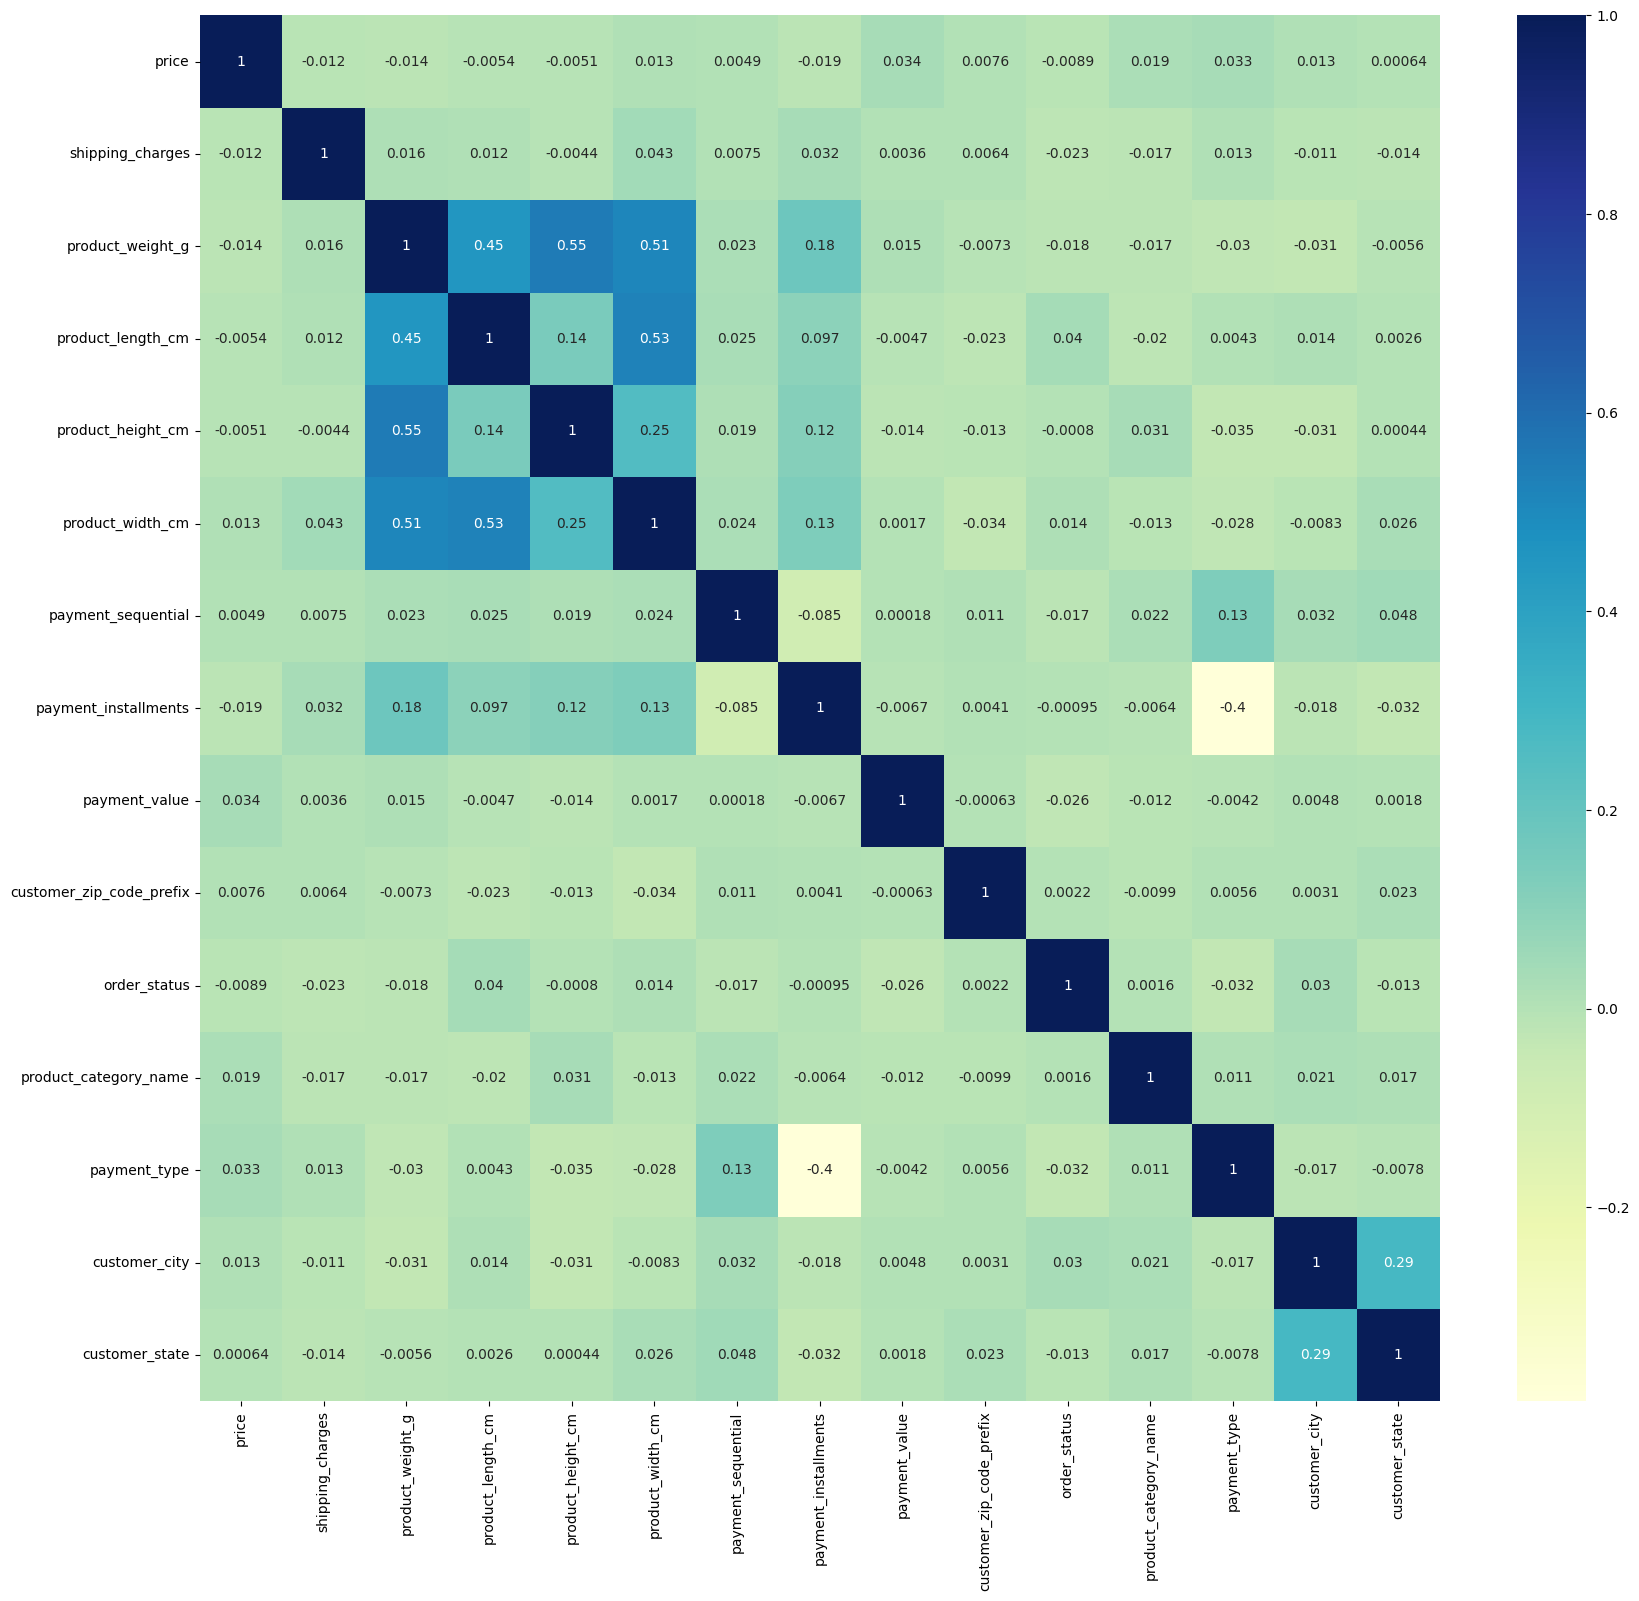

In [ ]:
plt.figure(figsize=(20, 18))

# Hitung matriks korelasi
co_mtx = df_final.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Menampilkan heatmap
plt.show()

In [ ]:
df_cleaned.to_excel("produk-customer.xlsx", index=False)